# Imports and Preparation

In [117]:
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sys
package_root_dir = os.path.join(os.getcwd(), "..")
sys.path.append(package_root_dir)

from ast import literal_eval

In [100]:
# Load the data.
melondy_df_folder = os.path.join(package_root_dir, "data", "processed")
melondy_df = pd.read_csv(os.path.join(melondy_df_folder, "melondy.csv"))
melondy_df.head()

,artist,album,genre,image_url,rating
0,Integrity,"Howling, for the Nightmare Shall Consume","['hardcore punk', 'heavy metal', 'metal', 'met...",https://d1j3ls2jacen4o.cloudfront.net/thumbnai...,7
1,Big Ups,Two Parts Together,"['indie rock', 'nerdcore', 'punk']",https://d1j3ls2jacen4o.cloudfront.net/thumbnai...,6
2,The Field,Looping State of Mind,"['ambient techno', 'minimal techno', 'shoegaze...",https://d1j3ls2jacen4o.cloudfront.net/thumbnai...,7
3,Mastodon,Once More Round the Sun,"['alternative metal', 'heavy metal', 'progress...",https://d1j3ls2jacen4o.cloudfront.net/thumbnai...,7
4,Various Artists,Dorner vs. Tookie,['hip hop'],https://d1j3ls2jacen4o.cloudfront.net/thumbnai...,7


# Genre Counting

Here, we outline how many genres Anthony has reviewed and what his favorite genres are!

In [101]:
unique_genre_set = set(genre for genre_list in melondy_df["genre"] for genre in literal_eval(genre_list))

In [102]:
print(len(unique_genre_set))
print(sorted(unique_genre_set))

507
['2-step', 'No genres', 'abstract hip hop', 'acid breaks', 'acid house', 'acid jazz', 'acid rock', 'acid techno', 'acidcore', 'acoustic rock', 'afro house', 'afro-jazz', 'afrobeat', 'afrobeats', 'afroswing', 'alternative country', 'alternative dance', 'alternative folk', 'alternative hip hop', 'alternative metal', 'alternative pop', 'alternative punk', 'alternative r&b', 'alternative rock', 'alté', 'ambient', 'ambient americana', 'ambient pop', 'ambient techno', 'americana', 'anarcho-punk', 'anatolian rock', 'anti-folk', 'aor', 'aquacrunk', 'arena rock', 'art pop', 'art punk', 'art rock', 'atmospheric black metal', 'atmospheric sludge metal', 'avant-folk', 'avant-garde', 'avant-garde jazz', 'avant-garde metal', 'avant-garde pop', 'avant-prog', 'ballad', 'ballroom house', 'baltimore club', 'baroque pop', 'beat music', 'bedroom pop', 'berlin school', 'bhangra', 'big band', 'big beat', 'bitpop', "black 'n' roll", 'black metal', 'blackened death metal', 'blackgaze', 'blue-eyed soul', '

In [103]:
f"There are {len(melondy_df["genre"].unique())} unique genre combos out of the {melondy_df.shape[0]} album reviews."

'There are 2097 unique genre combos out of the 3289 album reviews.'

We can see he has reviewed albums from 507 genres. Furthermore, many of his albums have a combination of genre labels. We can see there were 2097 unique genre combinations. However, let's dive deeper to see what the most common genres are!

In [104]:
genre_counts = {}
for genre_list in melondy_df["genre"]:
    for genre in literal_eval(genre_list):
        genre_counts[genre] = genre_counts.get(genre, 0) + 1

In [105]:
genre_counts_df = pd.DataFrame({'count': genre_counts.values()}, index=genre_counts.keys())
genre_counts_df.sort_values(by="count", ascending=False)

,count
rock,1124
hip hop,849
electronic,713
pop,594
indie rock,587
...,...
wonky techno,1
urban cowboy,1
sound art,1
p-funk,1


With all 507 genres in play, it's hard to get a full picture. Let's go old school and create a pie chart.

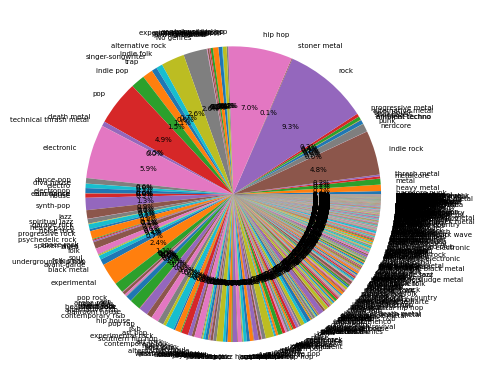

In [106]:
_ = plt.pie(
    genre_counts_df["count"],
    labels=genre_counts_df.index,
    autopct='%1.1f%%',
    # Use 'textprops' to set the font size for labels in a pie chart
    textprops={'fontsize': 5}
)

That's a little gross to look at. Let's look at the top few categories since if a genre is reviewed less than 3 times, it has a review rate of $<0.1\%$. Let's remove any genres that didn't make up the minimum percentage of genre composition and show the new pie based on that.

In [107]:
MIN_PERCENTAGE = 2
NUM_REVIEWS = melondy_df.shape[0]
MIN_COUNT = NUM_REVIEWS * MIN_PERCENTAGE / 100
print(f"Album must have been reviewed at least {MIN_COUNT} times to be labeled.")

filtered_genre_counts_df = genre_counts_df[genre_counts_df["count"] >= MIN_COUNT].copy(deep=True)
filtered_genre_counts_df.loc["OTHER"] = genre_counts_df[genre_counts_df["count"] < MIN_COUNT].sum().item()
filtered_genre_counts_df.sort_values("count", ascending=False)

Album must have been reviewed at least 65.78 times to be labeled.


,count
OTHER,4377
rock,1124
hip hop,849
electronic,713
pop,594
indie rock,587
No genres,311
alternative rock,309
experimental,292
indie pop,185


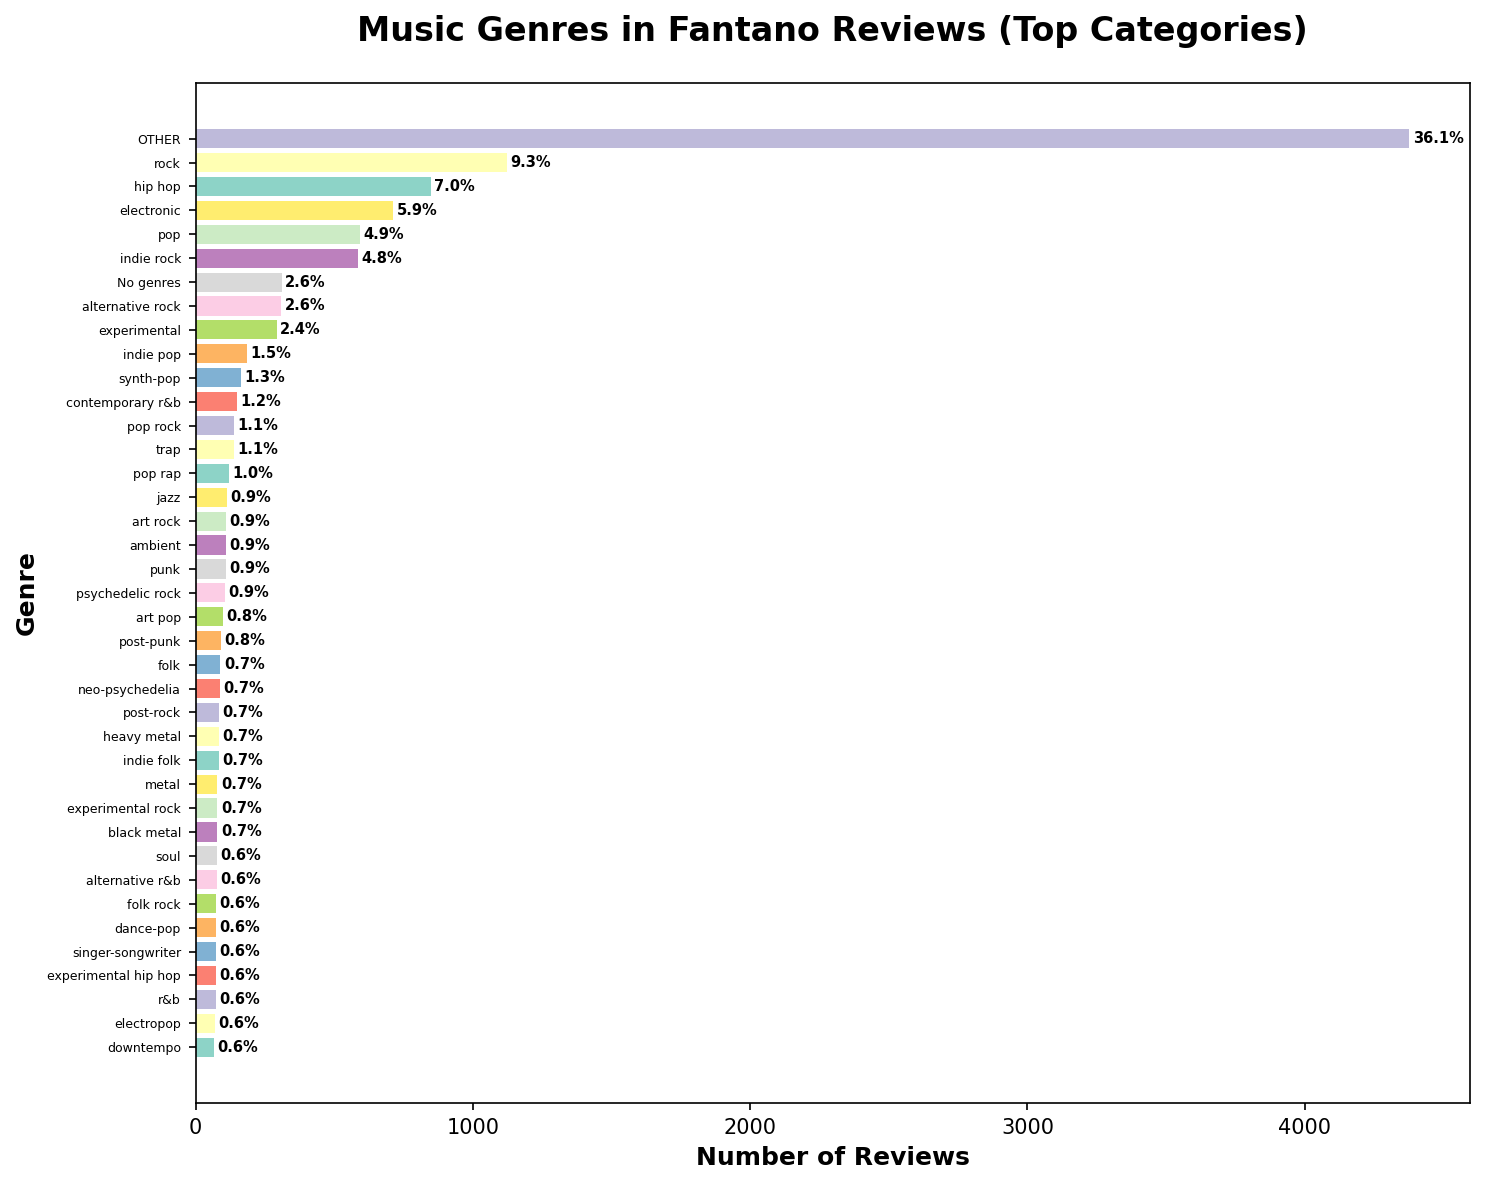

In [108]:
counts = filtered_genre_counts_df["count"]
genres = filtered_genre_counts_df.index

sorted_df = filtered_genre_counts_df.sort_values(by="count", ascending=True)
sorted_counts = sorted_df["count"]
sorted_genres = sorted_df.index

fig, ax = plt.subplots(figsize=(10, 8), dpi=150) # Adjust figure size for better readability
ax.barh(sorted_genres, sorted_counts, color=plt.get_cmap("Set3").colors)

# Add percentages to each bar (GPT Generated)
total_reviews = counts.sum() # Calculate the total number of reviews for percentage calculation
for i, count in enumerate(sorted_counts):
    percentage = (count / total_reviews) * 100
    # Place the text (percentage) next to each bar
    ax.text(
        count + (total_reviews * 0.001), # Position text slightly to the right of the bar
        i, # Y-coordinate for the text (same as the bar)
        f'{percentage:.1f}%', # Format percentage to one decimal place
        va='center', # Vertically align text to the center of the bar
        fontsize=7, # Set font size for readability
        weight='bold' # Make text bold
    )

ax.set_title(
    "Music Genres in Fantano Reviews (Top Categories)",
    fontsize=16,
    weight="bold",
    pad=20
)

ax.set_xlabel("Number of Reviews", fontsize=12, weight="bold")
ax.set_ylabel("Genre", fontsize=12, weight="bold")

ax.tick_params(axis='y', labelsize=6)
plt.tight_layout()
plt.show()

Let's see how many genres make up at least X% of reviews where X ranges from 1 to 10.

In [109]:
genre_pct = {}
for pct in range(1, 11):
    genre_pct[pct] = ((genre_counts_df["count"] / NUM_REVIEWS) >= (pct / 100)).sum().item()
genre_pct

{1: 74, 2: 38, 3: 19, 4: 13, 5: 9, 6: 8, 7: 8, 8: 8, 9: 7, 10: 5}

507 unique genres, but 74 of them ($< 20% $) have a $>1%$ make up of reviews. This indicates, we can probably create features for individual genres if they exceed X% of the makeup, where $X \geq 1$. This will help ensure that the dimensionality of the data doesn't grow too high.

Let's move on to the FUN stuff. How does Fantano rate things on a per genre basis?

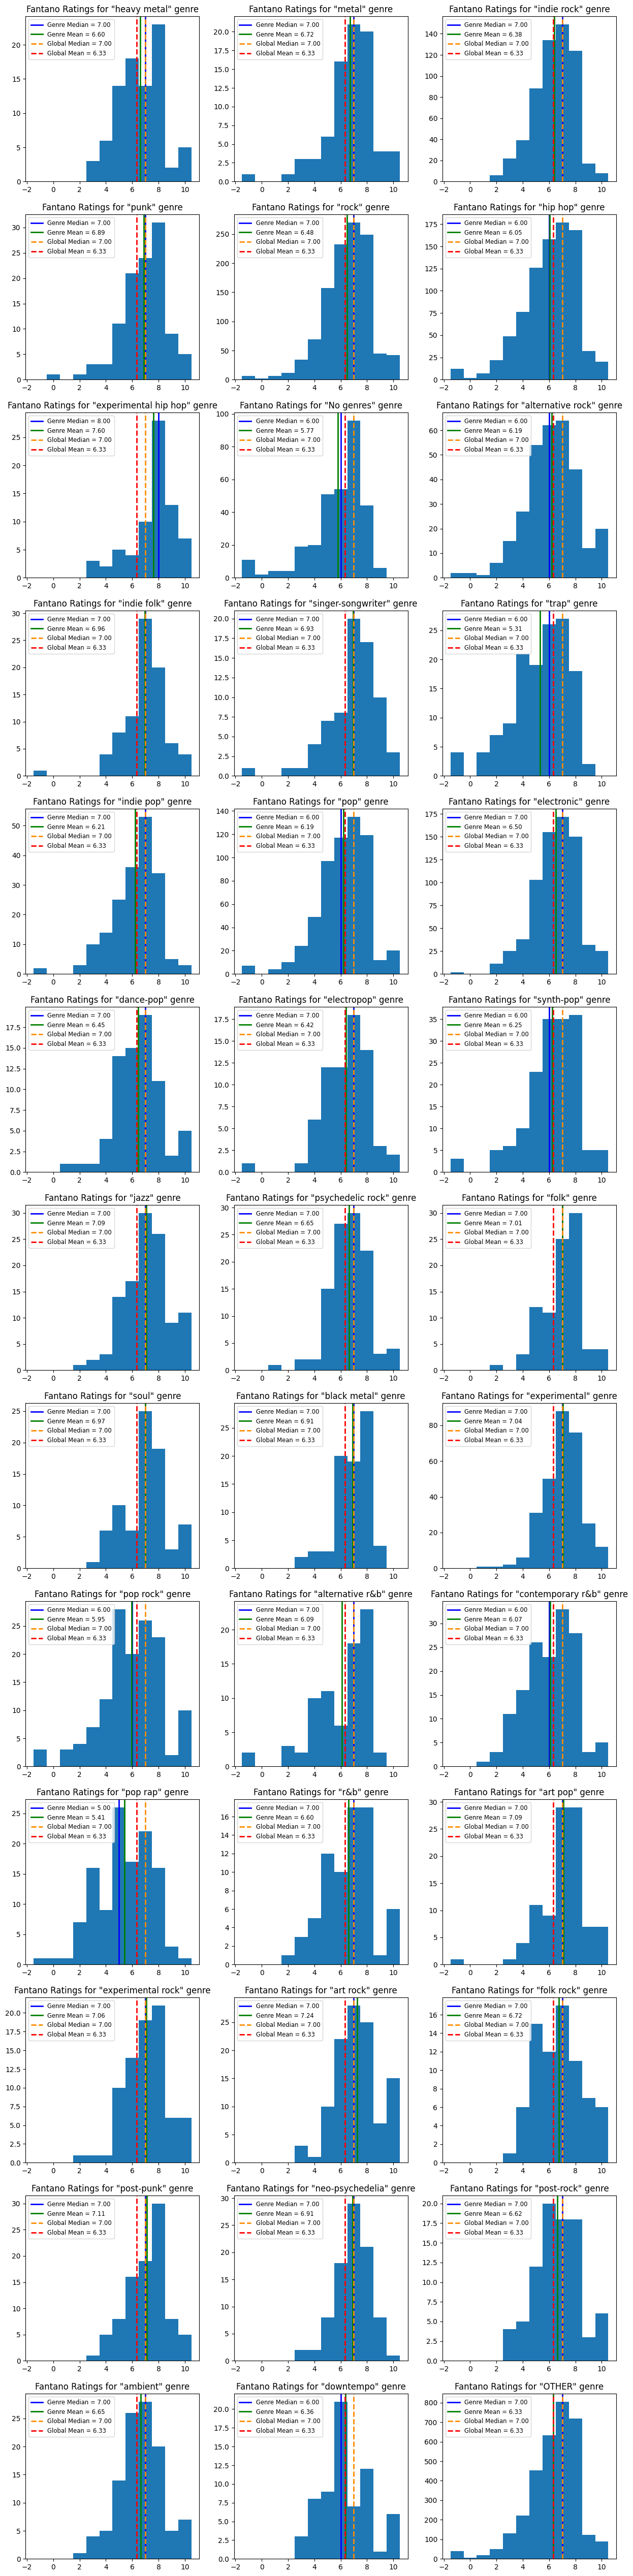

In [119]:
num_subtantial_genres = len(filtered_genre_counts_df.index) - 1
num_cols = 3
num_rows = num_subtantial_genres // num_cols + (num_subtantial_genres % num_cols > 0)

fig, ax = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, 5*num_rows))
ax = ax.flatten()

for i, genre in enumerate(filtered_genre_counts_df.index):
    if genre == "OTHER":
        melondy_by_genre = melondy_df[melondy_df["genre"].apply(lambda x: not any([g in filtered_genre_counts_df.index for g in x]))]
    else:
        melondy_by_genre = melondy_df[melondy_df["genre"].apply(lambda x: genre in literal_eval(x))]
    median_review_rating = melondy_df["rating"].median()
    mean_review_rating = melondy_df["rating"].mean()
    median_genre_review_rating = melondy_by_genre["rating"].median()
    mean_genre_review_rating = melondy_by_genre["rating"].mean()
    ax[i].set_title(f'Fantano Ratings for "{genre}" genre')
    ax[i].hist(melondy_by_genre["rating"], bins=np.arange(-1.5, 11.5, 1))
    ax[i].axvline(x=median_genre_review_rating, ls="-",  c="blue",       lw=2, label=f"Genre Median = {median_genre_review_rating:.2f}")
    ax[i].axvline(x=mean_genre_review_rating,   ls="-",  c="green",      lw=2, label=f"Genre Mean = {mean_genre_review_rating:.2f}")
    ax[i].axvline(x=median_review_rating,       ls="--", c="darkorange", lw=2, label=f"Global Median = {median_review_rating:.2f}")
    ax[i].axvline(x=mean_review_rating,         ls="--", c="red",        lw=2, label=f"Global Mean = {mean_review_rating:.2f}")
    # Set the font size of the legend to 'small'
    ax[i].legend(fontsize='small')

fig.savefig("genre_eda.pdf", bbox_inches="tight")


In [120]:
for genre in filtered_genre_counts_df.index:
    if genre != "OTHER":
        melondy_df[f"is_{genre}"] = melondy_df["genre"].apply(lambda x: genre in literal_eval(x))
melondy_df.drop(["genre"], inplace=True, axis=1)
melondy_df.head()

,artist,album,image_url,rating,is_heavy metal,is_metal,is_indie rock,is_punk,is_rock,is_hip hop,...,is_r&b,is_art pop,is_experimental rock,is_art rock,is_folk rock,is_post-punk,is_neo-psychedelia,is_post-rock,is_ambient,is_downtempo
0,Integrity,"Howling, for the Nightmare Shall Consume",https://d1j3ls2jacen4o.cloudfront.net/thumbnai...,7,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Big Ups,Two Parts Together,https://d1j3ls2jacen4o.cloudfront.net/thumbnai...,6,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,The Field,Looping State of Mind,https://d1j3ls2jacen4o.cloudfront.net/thumbnai...,7,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Mastodon,Once More Round the Sun,https://d1j3ls2jacen4o.cloudfront.net/thumbnai...,7,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,Various Artists,Dorner vs. Tookie,https://d1j3ls2jacen4o.cloudfront.net/thumbnai...,7,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
